# SS4202 Term Paper
## Sanchari Ray, Biyas Chowdhury, Barshan Ray

The goal is to implement independent component analysis in denoising magnetometer data from the Quasi-Zenith Satellite-1. The approach mirrors that of the [2021 paper by Imajo et al.](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2020JA028790).   
We begin by importing necessary modules.

## Initial setup and data tabulation

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['science','notebook','grid'])

The data for this analysis can be obtained from [the SEES website](https://sees.tksc.jaxa.jp/fw/dfw/SEES/English/Papers/data/2020/peer_reviewed/01/2020_reviewed_01.shtml). We deal with the data from the 23rd and 24th of April, 2012.   
After downloading the data, we have gone ahead and added headers to the `.dat` files.

In [3]:
df1 = pd.read_csv(r'C:\Users\Administrator\Downloads\20120423.dat',delim_whitespace=True)

In [4]:
df1

,UNIXTime,i,j,k,MAM1x,MAM1y,MAM1z,MAM2x,MAM2y,MAM2z,junk,a,b,c,d,e,f,g
0,1335139200,0,196,196,72.2536,514.2604,-181.5397,-541.5745,-109.6227,504.9447,68.0,0,1,0,0,1,0,0
1,1335139201,0,196,196,71.8965,512.8004,-180.3726,-541.9069,-109.7121,504.7570,68.0,0,1,0,0,1,0,0
2,1335139202,0,196,196,71.3952,512.7908,-181.5195,-543.1443,-110.3691,502.1519,68.0,0,1,0,0,1,0,0
3,1335139203,0,196,196,72.7376,512.0435,-180.7793,-542.6016,-110.1126,502.9364,68.0,0,1,0,0,1,0,0
4,1335139204,0,196,196,72.5194,514.2498,-181.1301,-542.6036,-109.7283,503.4656,68.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,1335225595,0,196,196,73.6716,489.6527,-192.5255,-541.6879,-134.7699,492.3115,68.0,0,1,0,0,1,0,0
86396,1335225596,0,196,196,73.9143,489.0399,-192.5940,-542.2207,-135.1659,492.2889,68.0,0,1,0,0,1,0,0
86397,1335225597,0,196,196,73.4523,488.9537,-193.0436,-541.4630,-134.9693,493.5005,68.0,0,1,0,0,1,0,0
86398,1335225598,0,196,196,73.5664,488.7007,-193.1268,-541.8016,-134.8573,492.0898,68.0,0,1,0,0,1,0,0


In [5]:
df2 = pd.read_csv(r'C:\Users\Administrator\Downloads\20120424.dat',delim_whitespace=True)

In [6]:
df2

,UNIXTime,i,j,k,MAM1x,MAM1y,MAM1z,MAM2x,MAM2y,MAM2z,junk,a,b,c,d,e,f,g
0,1335225600,0,196,196,73.4118,489.6023,-193.5345,-541.7343,-134.7548,492.2484,68.0,0,1,0,0,1,0,0
1,1335225601,0,196,196,73.9776,489.2527,-193.3625,-541.1448,-134.3573,492.8493,68.0,0,1,0,0,1,0,0
2,1335225602,0,196,196,71.8163,488.4766,-193.4202,-543.2318,-135.8522,489.6854,68.0,0,1,0,0,1,0,0
3,1335225603,0,196,196,73.9555,489.9393,-192.4871,-541.0990,-134.4008,494.6407,68.0,0,1,0,0,1,0,0
4,1335225604,0,196,196,74.3033,488.9973,-192.8895,-541.3858,-134.8266,494.2018,68.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,1335311995,0,196,196,70.7948,504.0819,-184.5903,-544.9388,-118.6849,503.2916,68.0,0,1,0,0,1,0,0
86396,1335311996,0,196,196,69.8900,504.7861,-184.5455,-545.3996,-118.9933,503.7762,68.0,0,1,0,0,1,0,0
86397,1335311997,0,196,196,69.8848,503.5966,-184.5467,-545.8909,-119.5575,501.2701,68.0,0,1,0,0,1,0,0
86398,1335311998,0,196,196,70.2449,506.4825,-184.0611,-545.2545,-118.8743,503.9418,68.0,0,1,0,0,1,0,0


### Combining the two datasets

In [7]:
df=pd.concat([df1,df2],axis=0,ignore_index=True)

In [8]:
df

,UNIXTime,i,j,k,MAM1x,MAM1y,MAM1z,MAM2x,MAM2y,MAM2z,junk,a,b,c,d,e,f,g
0,1335139200,0,196,196,72.2536,514.2604,-181.5397,-541.5745,-109.6227,504.9447,68.0,0,1,0,0,1,0,0
1,1335139201,0,196,196,71.8965,512.8004,-180.3726,-541.9069,-109.7121,504.7570,68.0,0,1,0,0,1,0,0
2,1335139202,0,196,196,71.3952,512.7908,-181.5195,-543.1443,-110.3691,502.1519,68.0,0,1,0,0,1,0,0
3,1335139203,0,196,196,72.7376,512.0435,-180.7793,-542.6016,-110.1126,502.9364,68.0,0,1,0,0,1,0,0
4,1335139204,0,196,196,72.5194,514.2498,-181.1301,-542.6036,-109.7283,503.4656,68.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172795,1335311995,0,196,196,70.7948,504.0819,-184.5903,-544.9388,-118.6849,503.2916,68.0,0,1,0,0,1,0,0
172796,1335311996,0,196,196,69.8900,504.7861,-184.5455,-545.3996,-118.9933,503.7762,68.0,0,1,0,0,1,0,0
172797,1335311997,0,196,196,69.8848,503.5966,-184.5467,-545.8909,-119.5575,501.2701,68.0,0,1,0,0,1,0,0
172798,1335311998,0,196,196,70.2449,506.4825,-184.0611,-545.2545,-118.8743,503.9418,68.0,0,1,0,0,1,0,0


We notice, the dataset deals with UNIX time. We convert these to Python `datetime` objects to deal with them better.

In [9]:
timestamps=df['UNIXTime']
times=[datetime.datetime.fromtimestamp(i) for i in timestamps]

## Data preprocessing

We extract channel data and correct them by the offset provided by the data source website.

In [10]:
XS1=df['MAM1x']
XS1=np.array(XS1)
XS1=XS1-60

ZS1=df['MAM1z']
ZS1=np.array(ZS1)
ZS1=ZS1+202

YS1=df['MAM1y']
YS1=np.array(YS1)
YS1=YS1-410

S1=np.array([XS1,YS1,ZS1]).transpose()

In [11]:
XS2=df['MAM2x']
XS2=np.array(XS2)
XS2=XS2+528

ZS2=df['MAM2z']
ZS2=np.array(ZS2)
ZS2=ZS2-474

YS2=df['MAM2y']
YS2=np.array(YS2)
YS2=YS2+200

S2=np.array([XS2,YS2,ZS2]).transpose()

## Data visualisation

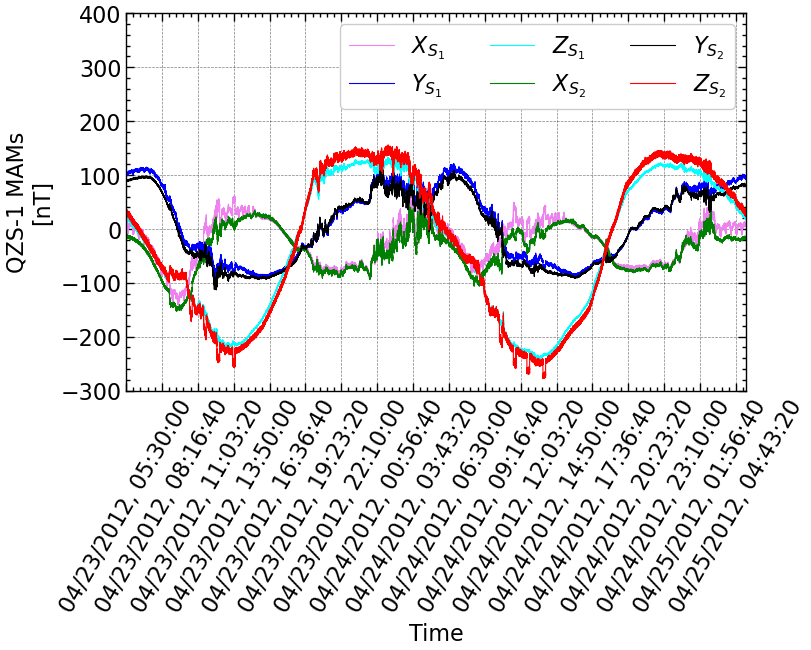

In [12]:
plt.rcParams["figure.figsize"]=[8,4.9]

plt.xticks(ticks=range(1335139200,1335311999,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[::10000]]],rotation=60)
plt.xlim(1335139200,1335311999)
plt.ylim(-300,400)

plt.plot(timestamps,XS1,'violet',lw=0.8,label="$X_{S_1}$")
plt.plot(timestamps,YS1,'blue',lw=0.8,label="$Y_{S_1}$")
plt.plot(timestamps,ZS1,'cyan',lw=0.8,label="$Z_{S_1}$")

# plt.plot(timestamps,S1,lw=0.8)

plt.plot(timestamps,XS2,'green',lw=0.8,label="$X_{S_2}$")
plt.plot(timestamps,YS2,'black',lw=0.8,label="$Y_{S_2}$")
plt.plot(timestamps,ZS2,'red',lw=0.8,label="$Z_{S_2}$")

# plt.plot(timestamps,S2,lw=0.8)

plt.legend(loc="upper right", ncol=3)
plt.ylabel("QZS-1 MAMs\n[nT]")
plt.xlabel("Time")

plt.show()

Here, $X_{S_1}$ refers to the $x$-component observed through the magnetometer $S_1$, and so on.

## Data processing

### Finding data trends

As is done in the referred paper, we compute a moving average with a window of 3600 seconds, to find trends in the timeseries.

#### Trend in X

In [13]:
trend_datax=[[np.mean(XS1[i:i+3600]) for i in range(len(XS1)-3600)],[np.mean(XS2[i:i+3600]) for i in range(len(XS2)-3600)]]

In [14]:
trend_datax=np.array(trend_datax).transpose()

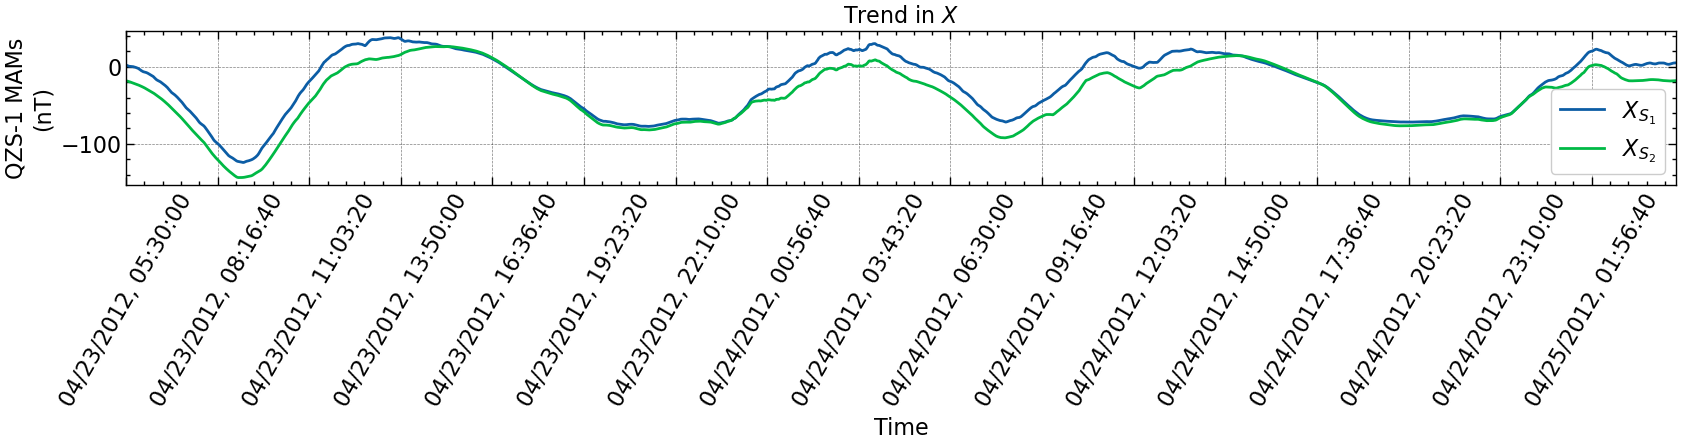

In [15]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.xlim(1335139200,1335308399)
plt.title("Trend in $X$")
plt.xlabel("Time")
plt.ylabel("QZS-1 MAMs\n(nT)")
plt.plot(timestamps[:-3600],trend_datax)
plt.legend(["$X_{S_1}$","$X_{S_2}$"])
plt.show()

#### Trend in Y

In [16]:
trend_datay=[[np.mean(YS1[i:i+3600]) for i in range(len(YS1)-3600)],[np.mean(YS2[i:i+3600]) for i in range(len(YS2)-3600)]]

In [17]:
trend_datay=np.array(trend_datay).transpose()

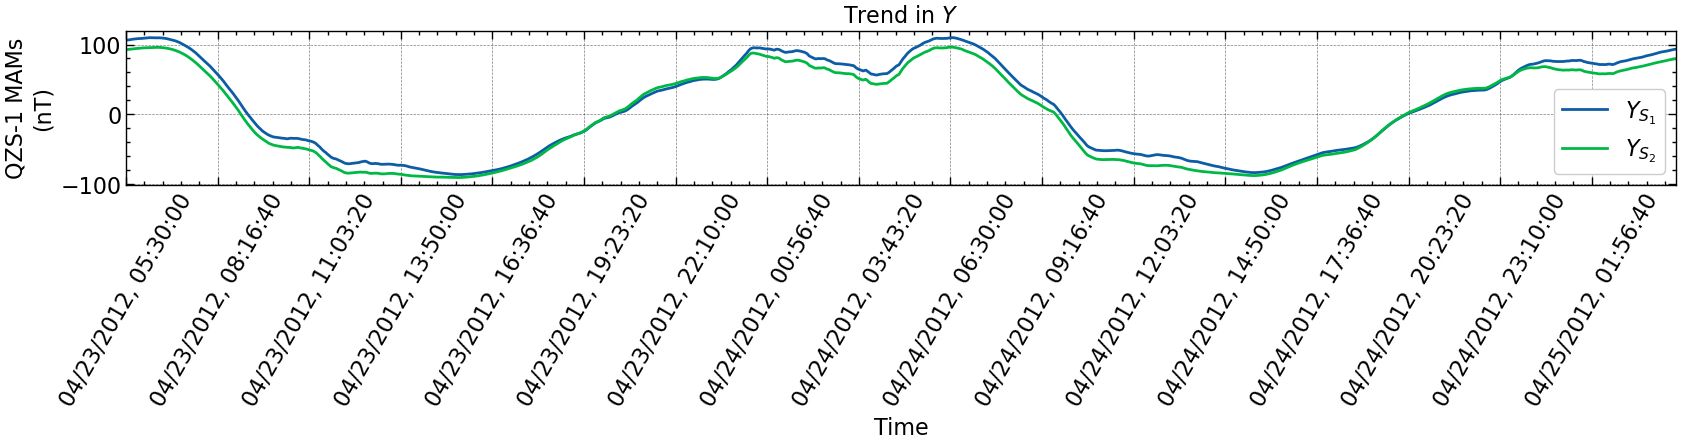

In [18]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.xlim(1335139200,1335308399)
plt.title("Trend in $Y$")
plt.xlabel("Time")
plt.ylabel("QZS-1 MAMs\n(nT)")
plt.plot(timestamps[:-3600],trend_datay)
plt.legend(["$Y_{S_1}$","$Y_{S_2}$"],loc="lower right")
plt.show()

#### Trend in Z

In [19]:
trend_dataz=[[np.mean(ZS1[i:i+3600]) for i in range(len(ZS1)-3600)],[np.mean(ZS2[i:i+3600]) for i in range(len(ZS2)-3600)]]

In [20]:
trend_dataz=np.array(trend_dataz).transpose()

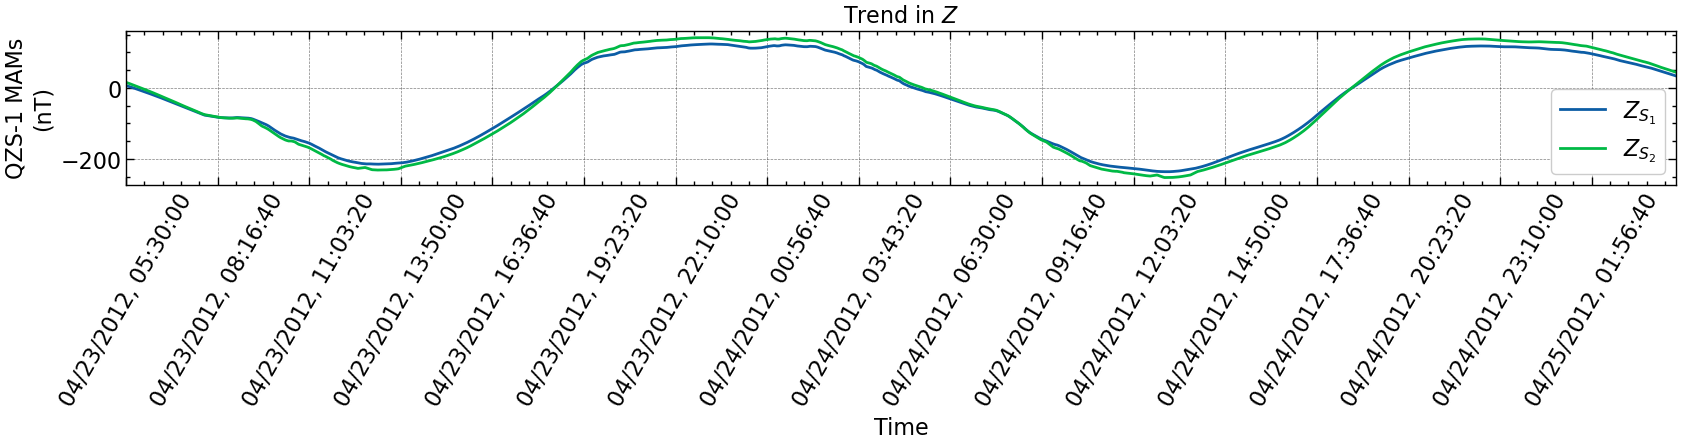

In [21]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.xlim(1335139200,1335308399)
plt.title("Trend in $Z$")
plt.xlabel("Time")
plt.ylabel("QZS-1 MAMs\n(nT)")
plt.plot(timestamps[:-3600],trend_dataz)
plt.legend(["$Z_{S_1}$","$Z_{S_2}$"])
plt.show()

All together, the data looks like this:

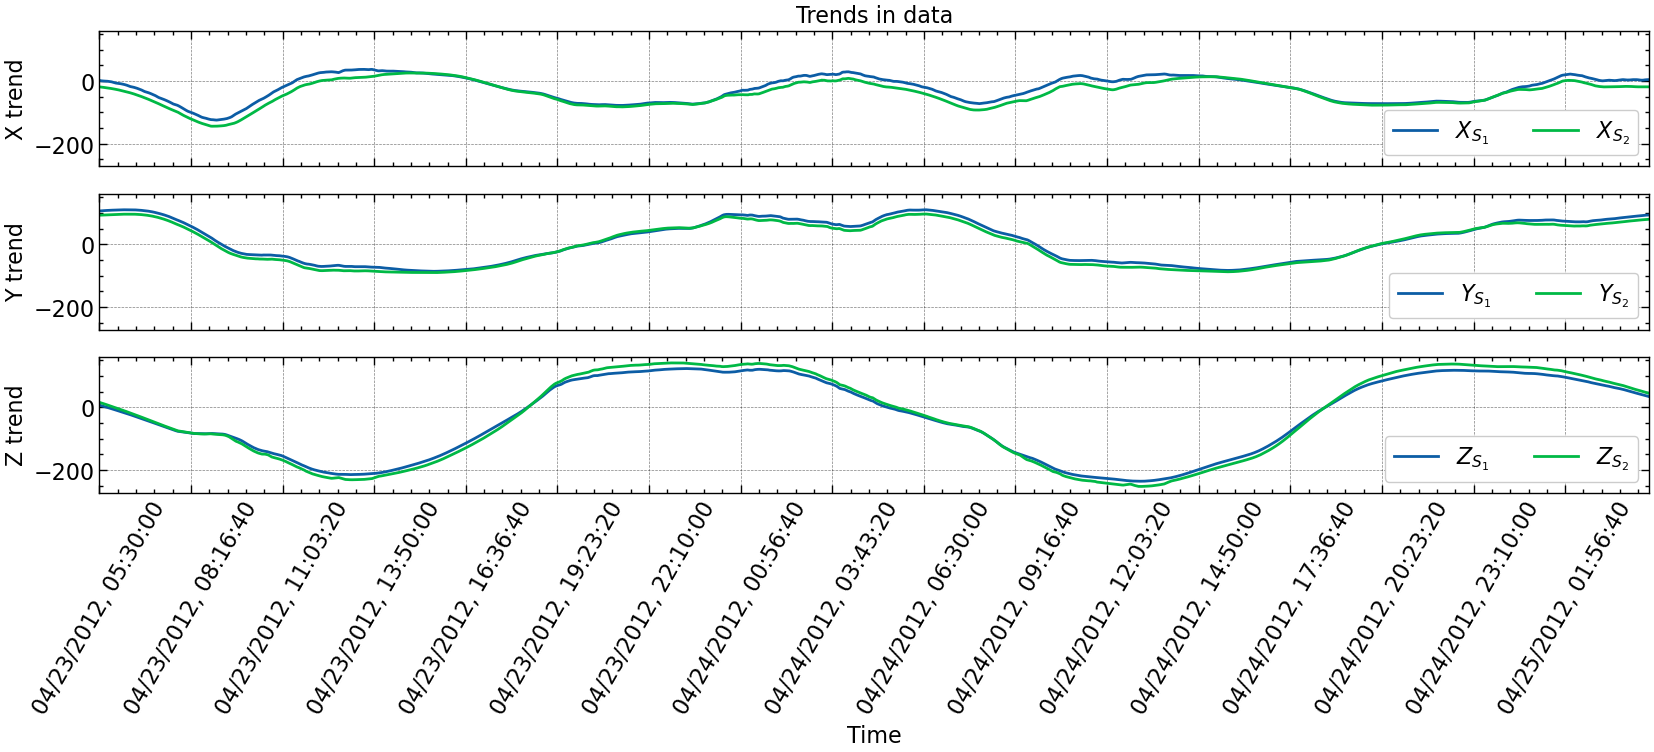

In [22]:
plt.rcParams["figure.figsize"]=[20,6]
fig, axs = plt.subplots(3,sharex=True,sharey=True)
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
axs[0].plot(timestamps[:-3600],trend_datax)
axs[0].set(ylabel="X trend")
axs[0].legend(["$X_{S_1}$","$X_{S_2}$"],loc="lower right",ncol=2)
axs[1].plot(timestamps[:-3600],trend_datay)
axs[1].set(ylabel="Y trend")
axs[1].legend(["$Y_{S_1}$","$Y_{S_2}$"],loc="lower right",ncol=2)
axs[2].plot(timestamps[:-3600],trend_dataz)
axs[2].set(ylabel="Z trend")
axs[2].legend(["$Z_{S_1}$","$Z_{S_2}$"],loc="lower right",ncol=2)
axs[0].set(title="Trends in data")
axs[2].set(xlabel="Time")
plt.show()

### Obtaining "detrended data"

Following in the footsteps of the paper, the next step is to obtain "detrended data", which is obtained by subtracting the data trends from the original timeseries. This is done as a preprocessing step, to further amplify the noise sources.

#### Detrended X data

In [23]:
detrended_x=np.array([XS1[:-3600]-trend_datax.transpose()[0],XS2[:-3600]-trend_datax.transpose()[1]]).transpose()

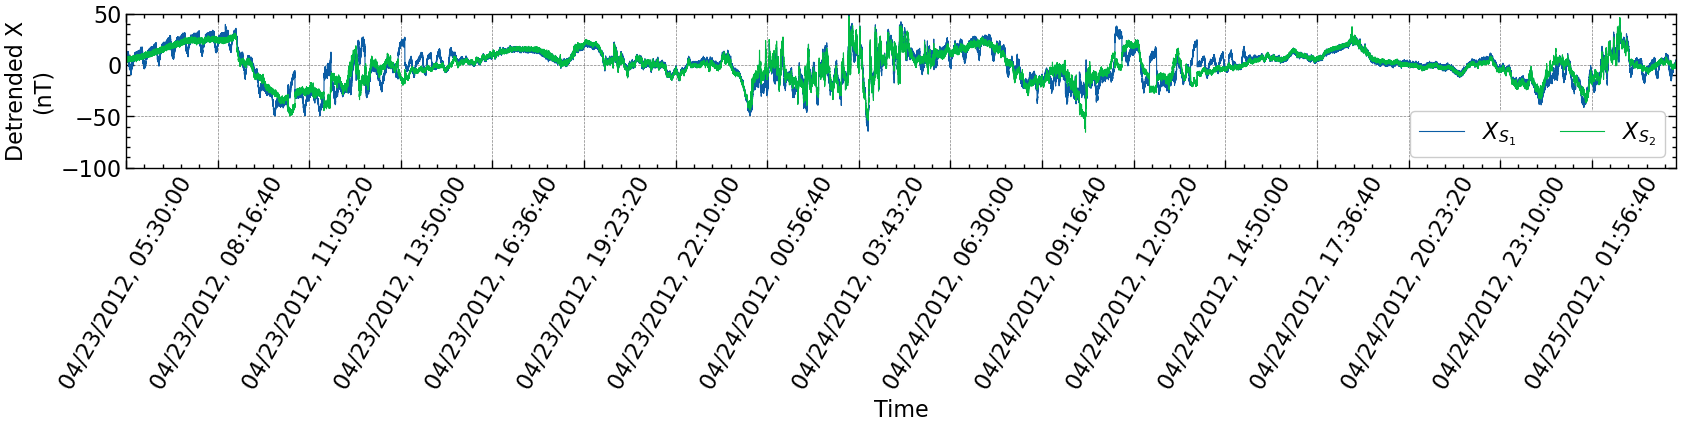

In [24]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.xlim(1335139200,1335308399)
plt.plot(timestamps[:-3600],detrended_x,lw=0.8)
plt.legend(["$X_{S_1}$","$X_{S_2}$"],loc="lower right",ncol=2)
plt.xlabel("Time")
plt.ylabel("Detrended X\n(nT)")
plt.ylim(-100,50)
plt.show()

#### Detrended Y data

In [25]:
detrended_y=np.array([YS1[:-3600]-trend_datay.transpose()[0],YS2[:-3600]-trend_datay.transpose()[1]]).transpose()

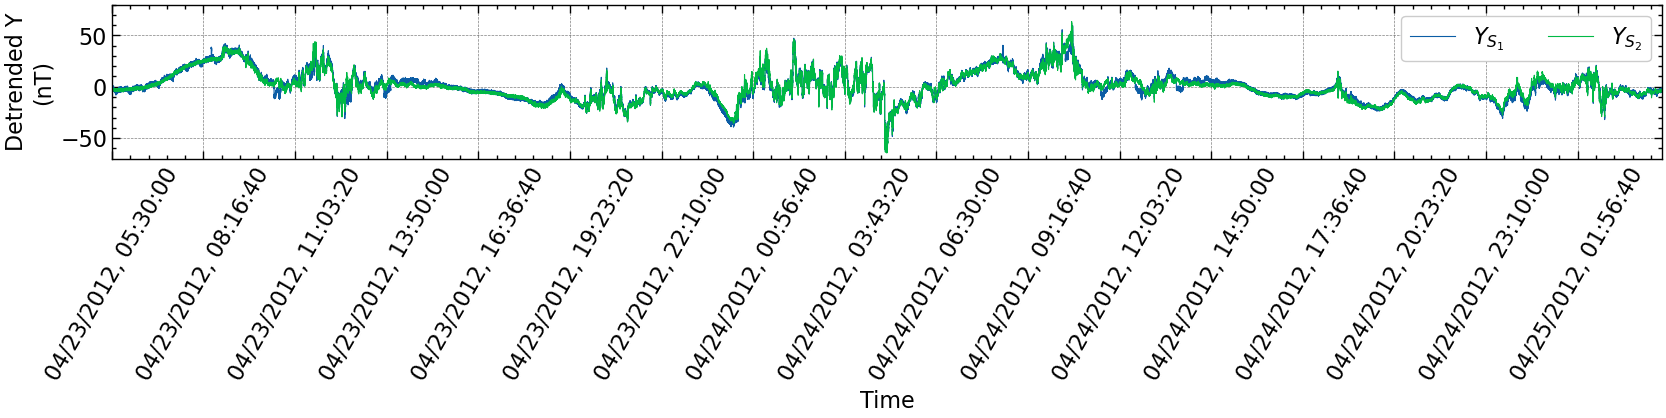

In [26]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.xlim(1335139200,1335308399)
plt.plot(timestamps[:-3600],detrended_y,lw=0.8)
plt.legend(["$Y_{S_1}$","$Y_{S_2}$"],loc="upper right",ncol=2)
plt.xlabel("Time")
plt.ylabel("Detrended Y\n(nT)")
plt.ylim(-70,80)
plt.show()

#### Detrended Z data

In [27]:
detrended_z=np.array([ZS1[:-3600]-trend_dataz.transpose()[0],ZS2[:-3600]-trend_dataz.transpose()[1]]).transpose()

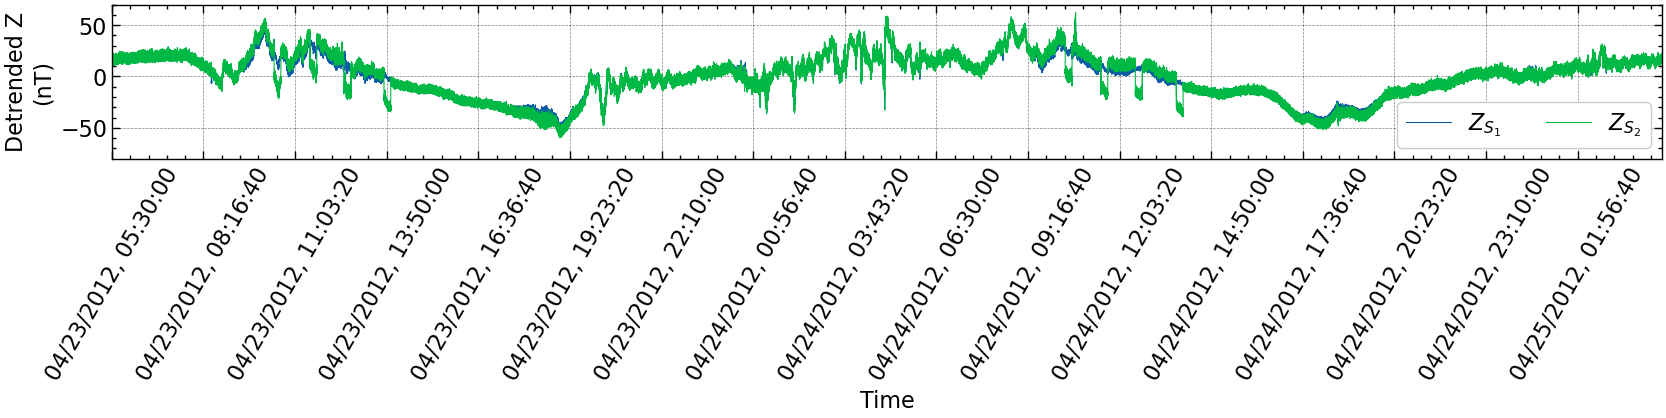

In [28]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.xlim(1335139200,1335308399)
plt.plot(timestamps[:-3600],detrended_z,lw=0.8)
plt.legend(["$Z_{S_1}$","$Z_{S_2}$"],loc="lower right",ncol=2)
plt.xlabel("Time")
plt.ylabel("Detrended Z\n(nT)")
plt.ylim(-80,70)
plt.show()

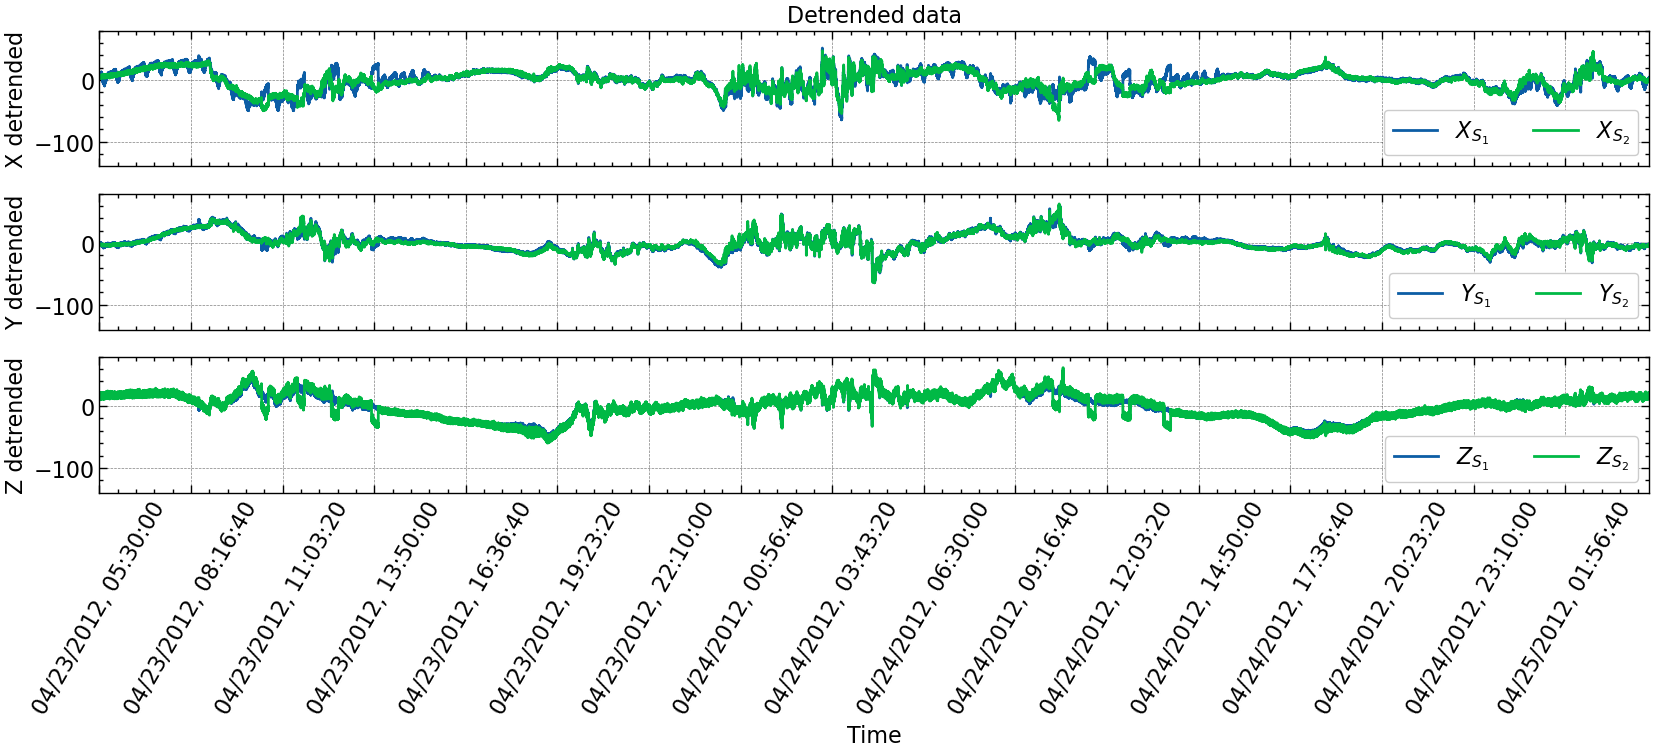

In [29]:
plt.rcParams["figure.figsize"]=[20,6]
fig, axs = plt.subplots(3,sharex=True,sharey=True)
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
axs[0].plot(timestamps[:-3600],detrended_x)
axs[0].set(ylabel="X detrended")
axs[0].legend(["$X_{S_1}$","$X_{S_2}$"],loc="lower right",ncol=2)
axs[1].plot(timestamps[:-3600],detrended_y)
axs[1].set(ylabel="Y detrended")
axs[1].legend(["$Y_{S_1}$","$Y_{S_2}$"],loc="lower right",ncol=2)
axs[2].plot(timestamps[:-3600],detrended_z)
axs[2].set(ylabel="Z detrended")
axs[2].legend(["$Z_{S_1}$","$Z_{S_2}$"],loc="lower right",ncol=2)
axs[0].set(title="Detrended data")
axs[2].set(xlabel="Time")
plt.ylim(-140,80)
plt.show()

## Independent component analysis

We finally get to the ICA stage. We first concatenate all 6 detrended time series (3 components from 2 magnetometers) into one vector   
`detrended_data`$=\left[X_{S_1} \left(t\right)\quad X_{S_2}\left(t\right)\quad Y_{S_1}\left(t\right) \quad Y_{S_2}\left(t\right)\quad Z_{S_1}\left(t\right)\quad Z_{S_2}\left(t\right)\right]$

In [30]:
detrended_data=np.concatenate([detrended_x,detrended_y,detrended_z],axis=1)

Let's take a look at `detrended_data`$^T$, which corresponds to the vector
\begin{bmatrix}
    X_{S_1} \left(t\right)\\ X_{S_2}\left(t\right)\\ Y_{S_1}\left(t\right) \\ Y_{S_2}\left(t\right)\\ Z_{S_1}\left(t\right)\\ Z_{S_2}\left(t\right)
\end{bmatrix}

In [31]:
detrended_data.transpose()

array([[ 9.93039283,  9.58151864,  9.08856153, ...,  3.8075755 ,
         3.49277406,  4.25388522],
       [ 4.66583592,  4.33624058,  3.10158725, ...,  2.18383925,
         2.72647522,  2.765085  ],
       [-1.86411675, -3.32568042, -3.33706783, ..., -3.23384272,
        -1.41651814, -1.61699011],
       [-2.18998392, -2.28071392, -2.93902897, ..., -2.80665142,
        -2.28697711, -2.26004794],
       [13.74003461, 14.91516497, 13.77650475, ..., 17.63834642,
        18.12245733, 17.79966522],
       [15.30083789, 15.12157711, 12.52507256, ..., 19.369666  ,
        19.07948636, 21.57528119]])

We make use of the FastICA algorithm from `sklearn`'s `decomposition` module.

In [32]:
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=6,
            random_state=0,
            whiten='unit-variance')
X_transformed = transformer.fit_transform(detrended_data)
mixing_matrix=transformer.mixing_

### Visualising the independent components

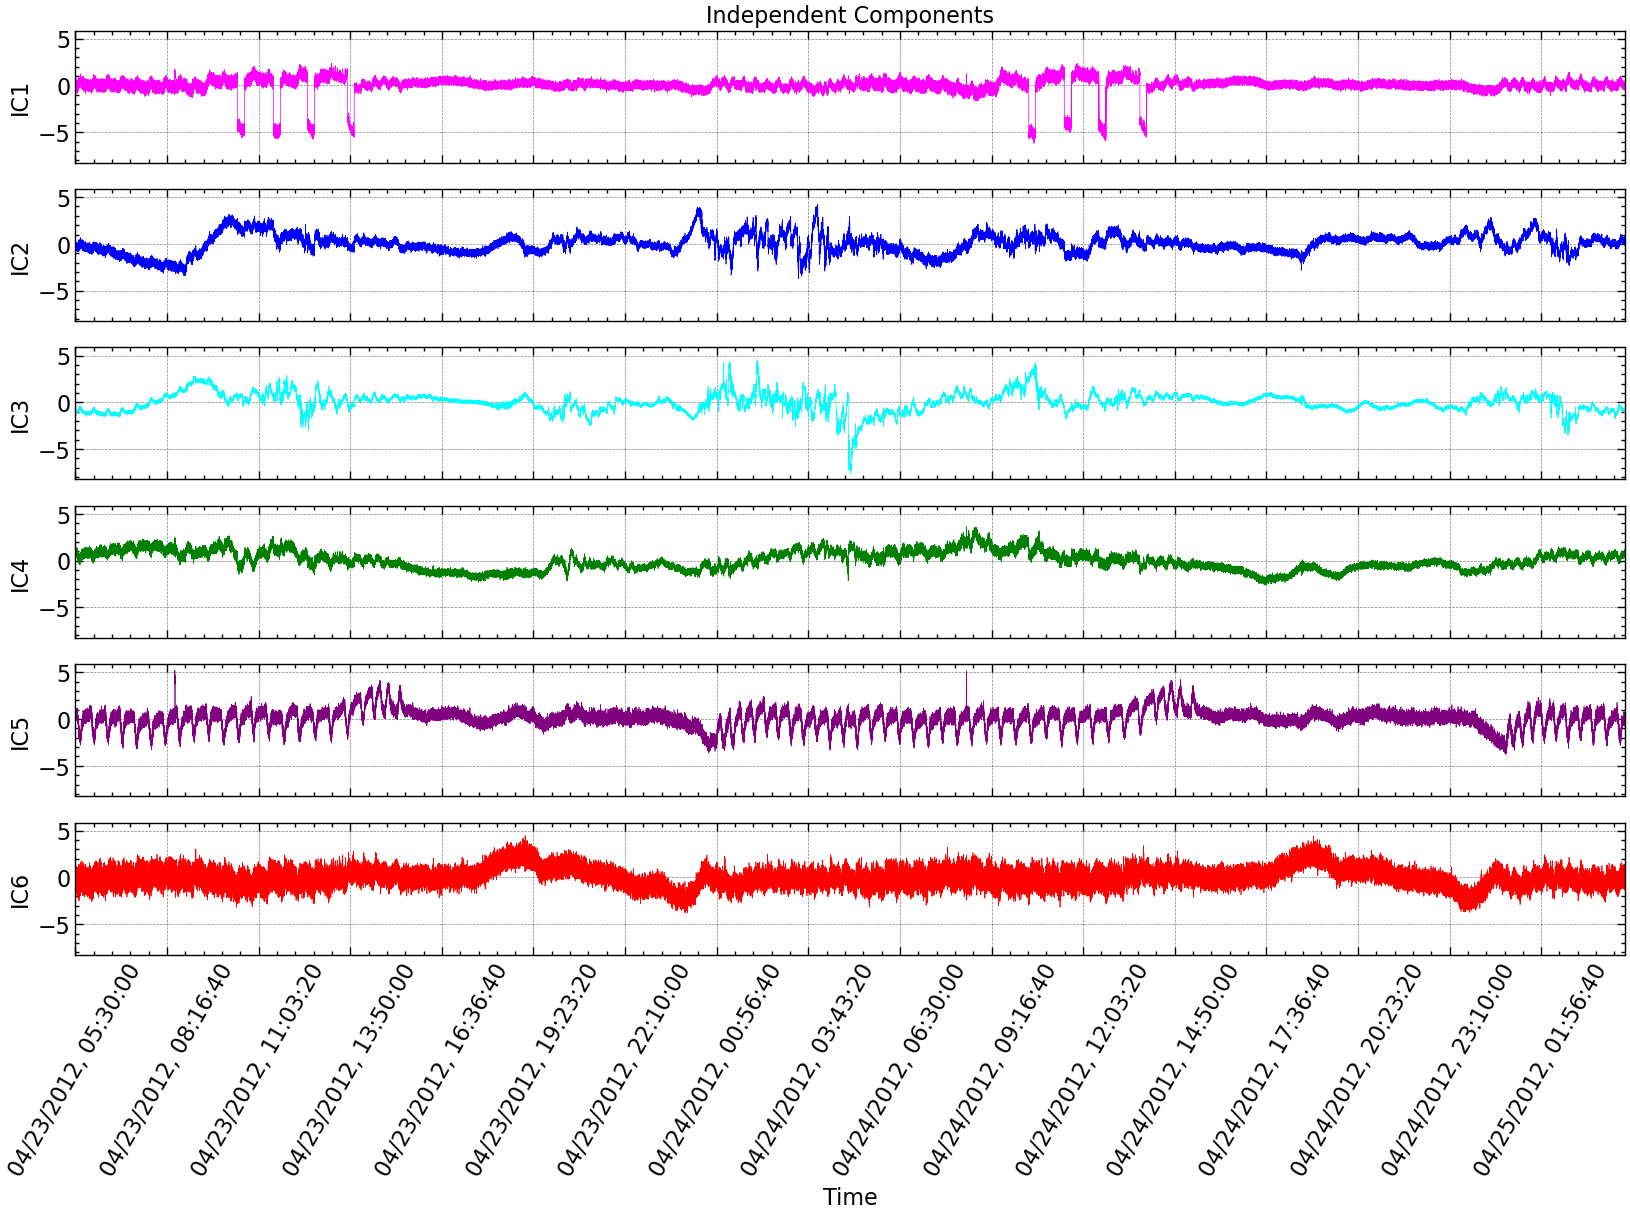

In [33]:
plt.rcParams["figure.figsize"]=[20,12]
fig, axs = plt.subplots(6,sharex=True,sharey=True)
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
axs[0].plot(timestamps[:-3600],X_transformed.transpose()[5],'magenta',lw=0.5)
axs[0].set(ylabel="IC1")
axs[0].set(title="Independent Components")
axs[1].plot(timestamps[:-3600],X_transformed.transpose()[4],'blue',lw=0.5)
axs[1].set(ylabel="IC2")
axs[2].plot(timestamps[:-3600],X_transformed.transpose()[3],'cyan',lw=0.5)
axs[2].set(ylabel="IC3")
axs[3].plot(timestamps[:-3600],X_transformed.transpose()[2],'green',lw=0.5)
axs[3].set(ylabel="IC4")
axs[4].plot(timestamps[:-3600],X_transformed.transpose()[1],'purple',lw=0.5)
axs[4].set(ylabel="IC5")
axs[5].plot(timestamps[:-3600],X_transformed.transpose()[0],'red',lw=0.5)
axs[5].set(ylabel="IC6")
plt.xlabel("Time")
plt.savefig("independent-components.png",dpi=300)

Thus, we have obtained our mixing matrix $\mathbf{A}$.

In [34]:
mixing_matrix

array([[  3.14151031,   3.32176495,  -1.69284837,  -5.75658774,
        -13.3454245 ,  -1.63906147],
       [  3.66040257,  -0.87822222,  -1.57629871,  -4.83690667,
        -12.17086374,   4.97965436],
       [  0.06715969,   0.82065543,   8.46006187,   9.81764204,
         -3.83138189,  -0.11484429],
       [ -1.03178459,  -0.71895425,   7.77046701,   9.85139931,
         -4.01599757,  -2.0510277 ],
       [ -6.80501989,  -4.47263891,  15.80224481,  -2.85961198,
          3.94179973,  -2.69525187],
       [ -9.15871149,  -3.8012266 ,  17.7468363 ,  -2.35283412,
          4.15302515,   2.51372864]])

Again, following in the footsteps of the paper, we note that at least three ICs are required to restore the three-dimensional magnetic vector. We use IC2, IC3, and IC4 to restore the data without noise. This corresponds to defining $\mathbf{A}_\text{clean}$ where the components corresponding to the factors of the noise ICs are set to zero, i.e. the first, fifth, and sixth columns of $\mathbf{A}_\text{clean}$ are set to zero.

In [35]:
A_clean=np.zeros((6,6))
for i in range(6):
    for j in range(6):
        if j==0 or j==4 or j==5:
            A_clean[i][j]=0
        else:
            A_clean[i][j]=mixing_matrix[i][j]

In [36]:
A_clean

array([[ 0.        ,  3.32176495, -1.69284837, -5.75658774,  0.        ,
         0.        ],
       [ 0.        , -0.87822222, -1.57629871, -4.83690667,  0.        ,
         0.        ],
       [ 0.        ,  0.82065543,  8.46006187,  9.81764204,  0.        ,
         0.        ],
       [ 0.        , -0.71895425,  7.77046701,  9.85139931,  0.        ,
         0.        ],
       [ 0.        , -4.47263891, 15.80224481, -2.85961198,  0.        ,
         0.        ],
       [ 0.        , -3.8012266 , 17.7468363 , -2.35283412,  0.        ,
         0.        ]])

Now, noting that the separating matrix $\mathbf{W}=\mathbf{A}^{-1}$, we define the filter matrix
$$\mathbf{F}=\mathbf{A}_\text{clean}\mathbf{W}$$
such that
$$\mathbf{x}_\text{clean}=\mathbf{F}\mathbf{x}$$
We go over the theory of this in our paper.

In [37]:
filter_matrix=np.matmul(A_clean,np.linalg.inv(mixing_matrix))

In [38]:
filter_matrix

array([[ 0.58794778, -0.45665038,  0.51021698, -0.96629538, -0.21545573,
         0.29185055],
       [ 0.01731892,  0.13811243, -0.29917792, -0.07376648,  0.2222415 ,
        -0.09787236],
       [-0.17187251, -0.07319316,  1.43405205, -0.55174749,  0.18521768,
        -0.15315153],
       [-0.37139867,  0.13722417,  1.0074639 , -0.132938  ,  0.28991587,
        -0.26559587],
       [-0.5408437 ,  0.86814104,  2.28314519, -2.10159705,  2.25747667,
        -1.2623788 ],
       [-0.47127729,  0.79456669,  2.76635777, -2.50675289,  2.34619086,
        -1.28465094]])

Thus, with our filter matrix, we obtain our noise-cleaned detrended data.

In [39]:
data_clean=np.matmul(filter_matrix,detrended_data.transpose())

In [40]:
data_clean

array([[ 6.37815275,  5.35999422,  5.75182242, ...,  4.15626223,
         3.95945792,  5.05896115],
       [ 3.09172039,  3.76282487,  3.63680334, ...,  3.56630719,
         3.18975211,  2.95024941],
       [-3.31164055, -5.02834389, -4.31959777, ..., -3.60275593,
        -1.13485104, -2.01285804],
       [-4.71515283, -5.70292118, -5.25371393, ..., -4.03018895,
        -1.85958294, -3.09896397],
       [10.72858199, 10.3639734 , 11.6235202 , ..., 13.71799495,
        18.87559349, 14.10383501],
       [11.9407917 , 11.01492004, 12.54904442, ..., 14.53006526,
        20.34285557, 15.42920017]])

## Final de-noised data visualisation

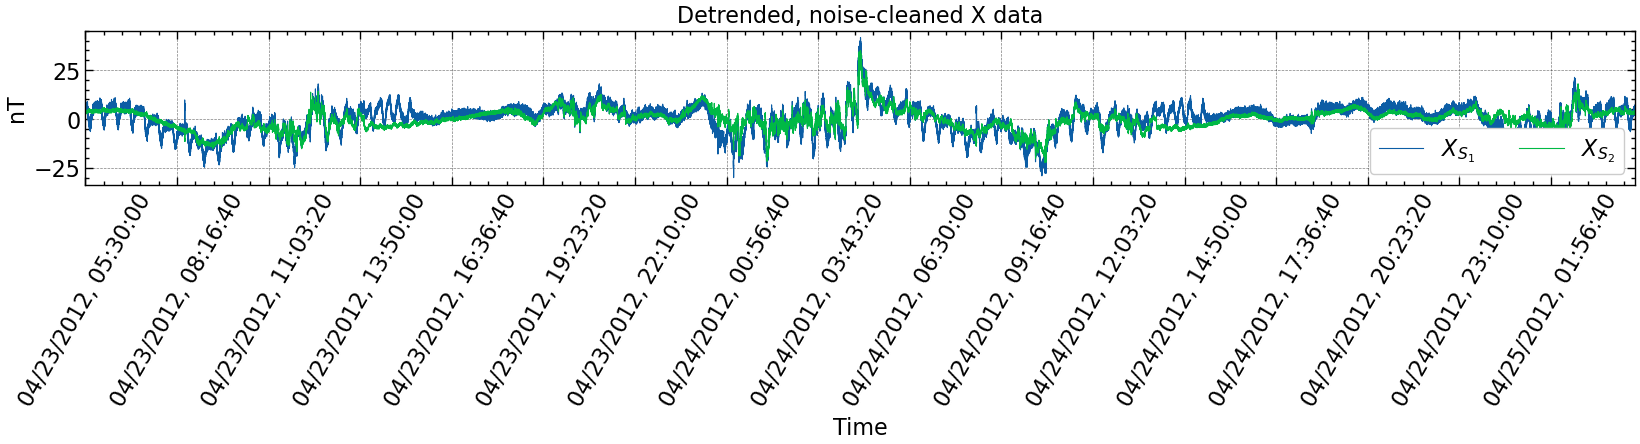

In [41]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.plot(timestamps[:-3600],data_clean[0],lw=0.8)
plt.plot(timestamps[:-3600],data_clean[1],lw=0.8)
plt.title("Detrended, noise-cleaned X data")
plt.legend(["$X_{S_1}$","$X_{S_2}$"],loc="lower right",ncol=2)
plt.xlabel("Time")
plt.ylabel("nT")
plt.show()

We add this detrended, noise-cleaned data to trend data to obtain the complete de-noised signal.

In [42]:
detrended_cleanx=np.concatenate([data_clean[0].reshape(-1,1),data_clean[1].reshape(-1,1)],axis=1)

In [43]:
trend_x_clean=trend_datax+detrended_cleanx

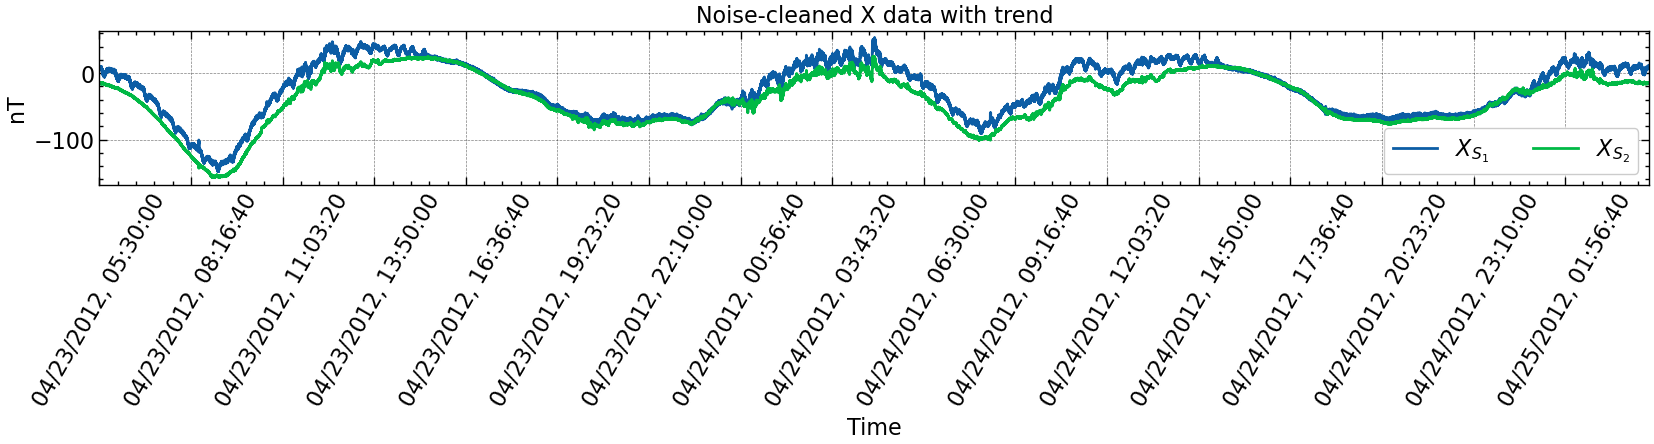

In [44]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.plot(timestamps[:-3600],trend_x_clean)
plt.title("Noise-cleaned X data with trend")
plt.legend(["$X_{S_1}$","$X_{S_2}$"],loc="lower right",ncol=2)
plt.xlabel("Time")
plt.ylabel("nT")
plt.show()

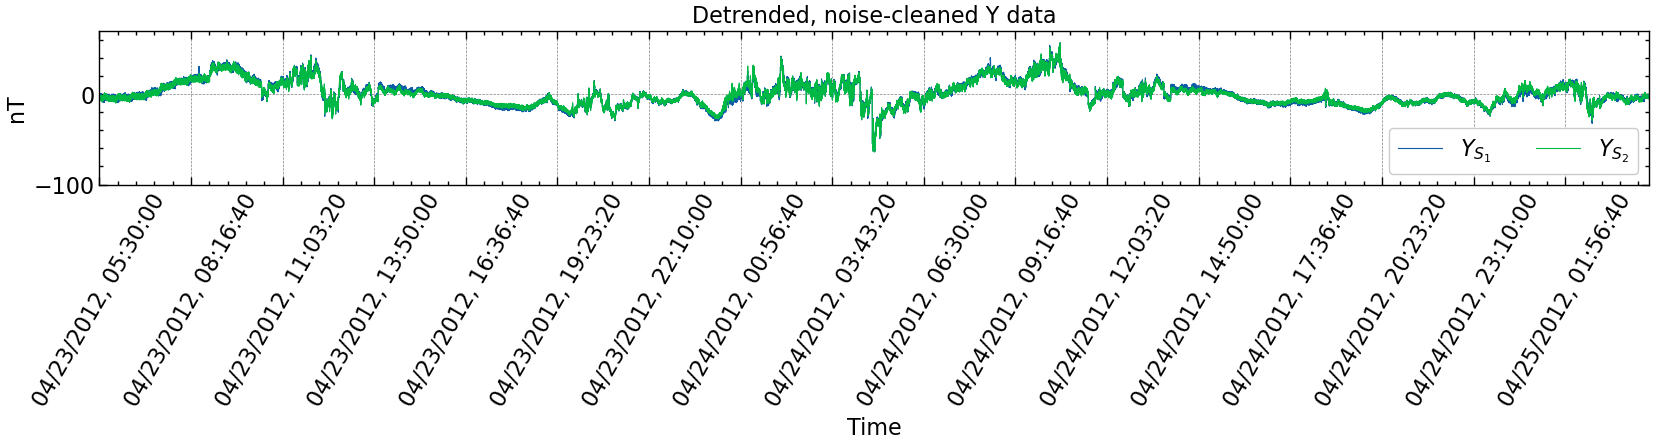

In [45]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.plot(timestamps[:-3600],data_clean[2],lw=0.8)
plt.plot(timestamps[:-3600],data_clean[3],lw=0.8)
plt.title("Detrended, noise-cleaned Y data")
plt.legend(["$Y_{S_1}$","$Y_{S_2}$"],loc="lower right",ncol=2)
plt.xlabel("Time")
plt.ylabel("nT")
plt.ylim(-100,70)
plt.show()

In [46]:
detrended_cleany=np.concatenate([data_clean[2].reshape(-1,1),data_clean[3].reshape(-1,1)],axis=1)

In [47]:
trend_y_clean=trend_datay+detrended_cleany

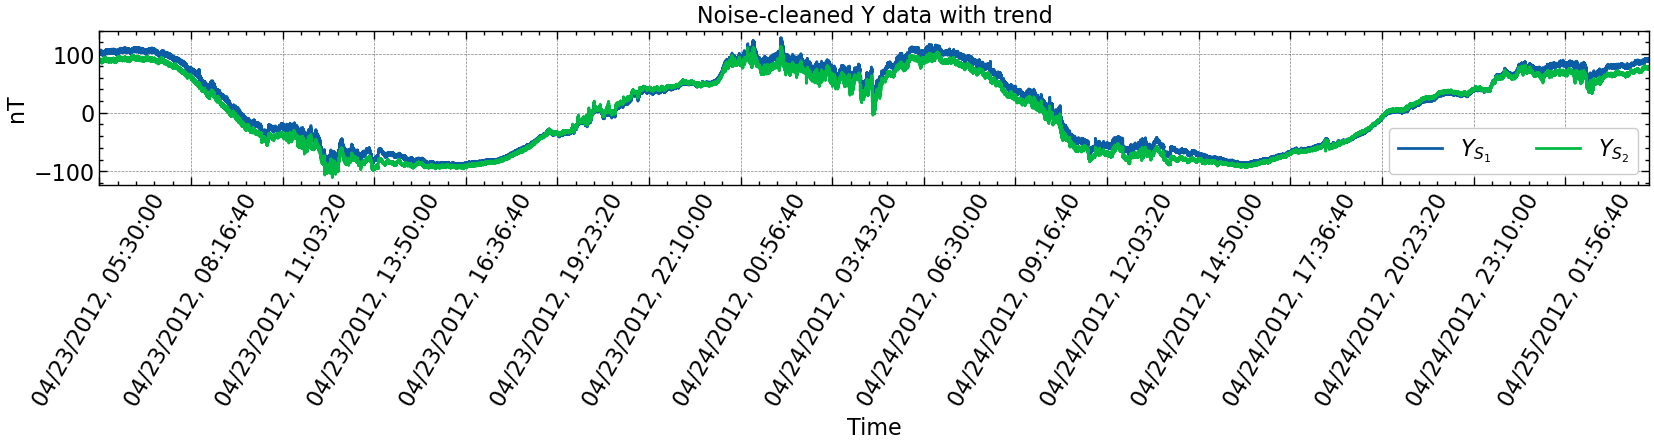

In [48]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.plot(timestamps[:-3600],trend_y_clean)
plt.title("Noise-cleaned Y data with trend")
plt.legend(["$Y_{S_1}$","$Y_{S_2}$"],loc="lower right",ncol=2)
plt.xlabel("Time")
plt.ylabel("nT")
plt.show()

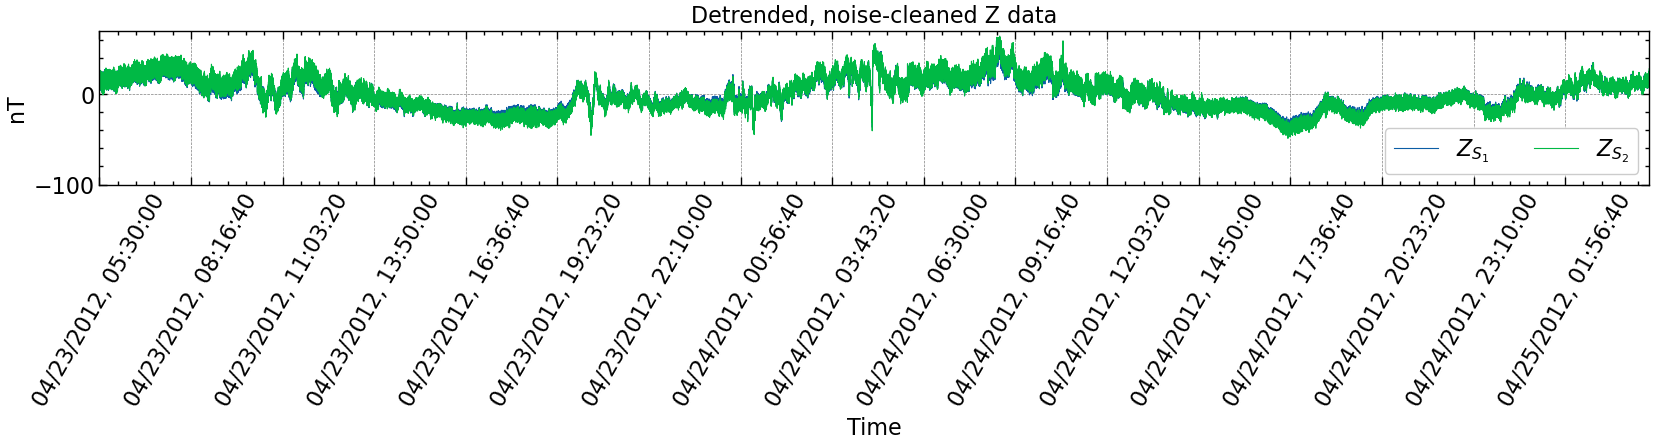

In [49]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.plot(timestamps[:-3600],data_clean[4],lw=0.8)
plt.plot(timestamps[:-3600],data_clean[5],lw=0.8)
plt.title("Detrended, noise-cleaned Z data")
plt.legend(["$Z_{S_1}$","$Z_{S_2}$"],loc="lower right",ncol=2)
plt.xlabel("Time")
plt.ylabel("nT")
plt.ylim(-100,70)
plt.show()

In [50]:
detrended_cleanz=np.concatenate([data_clean[4].reshape(-1,1),data_clean[5].reshape(-1,1)],axis=1)

In [51]:
trend_z_clean=trend_dataz+detrended_cleanz

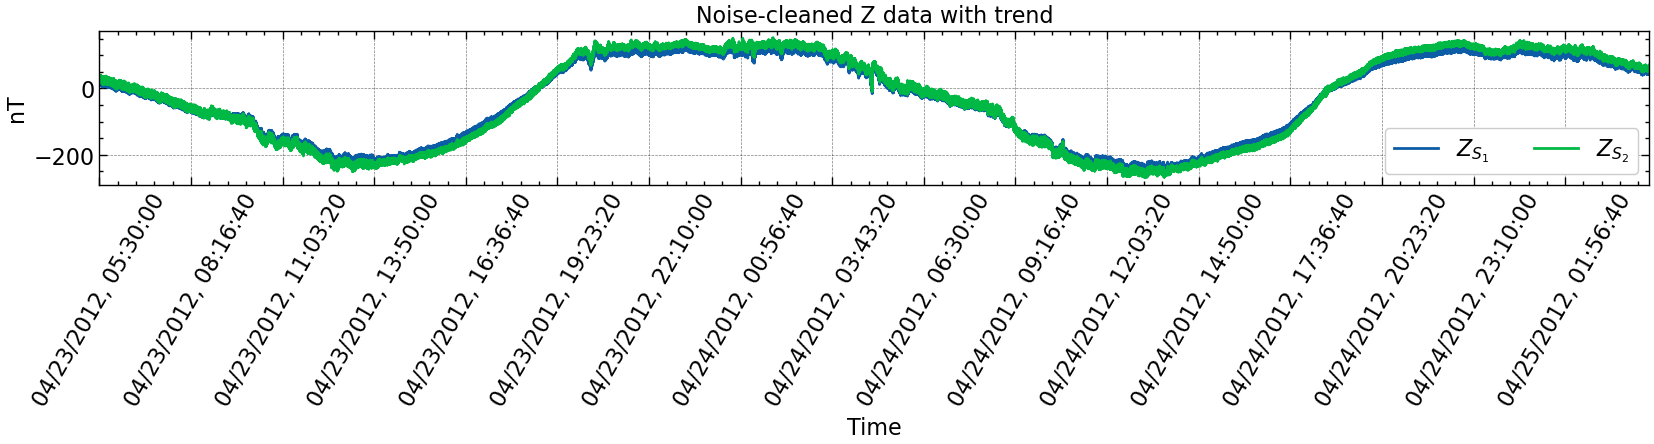

In [52]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.plot(timestamps[:-3600],trend_z_clean)
plt.title("Noise-cleaned Z data with trend")
plt.legend(["$Z_{S_1}$","$Z_{S_2}$"],loc="lower right",ncol=2)
plt.xlabel("Time")
plt.ylabel("nT")
plt.show()

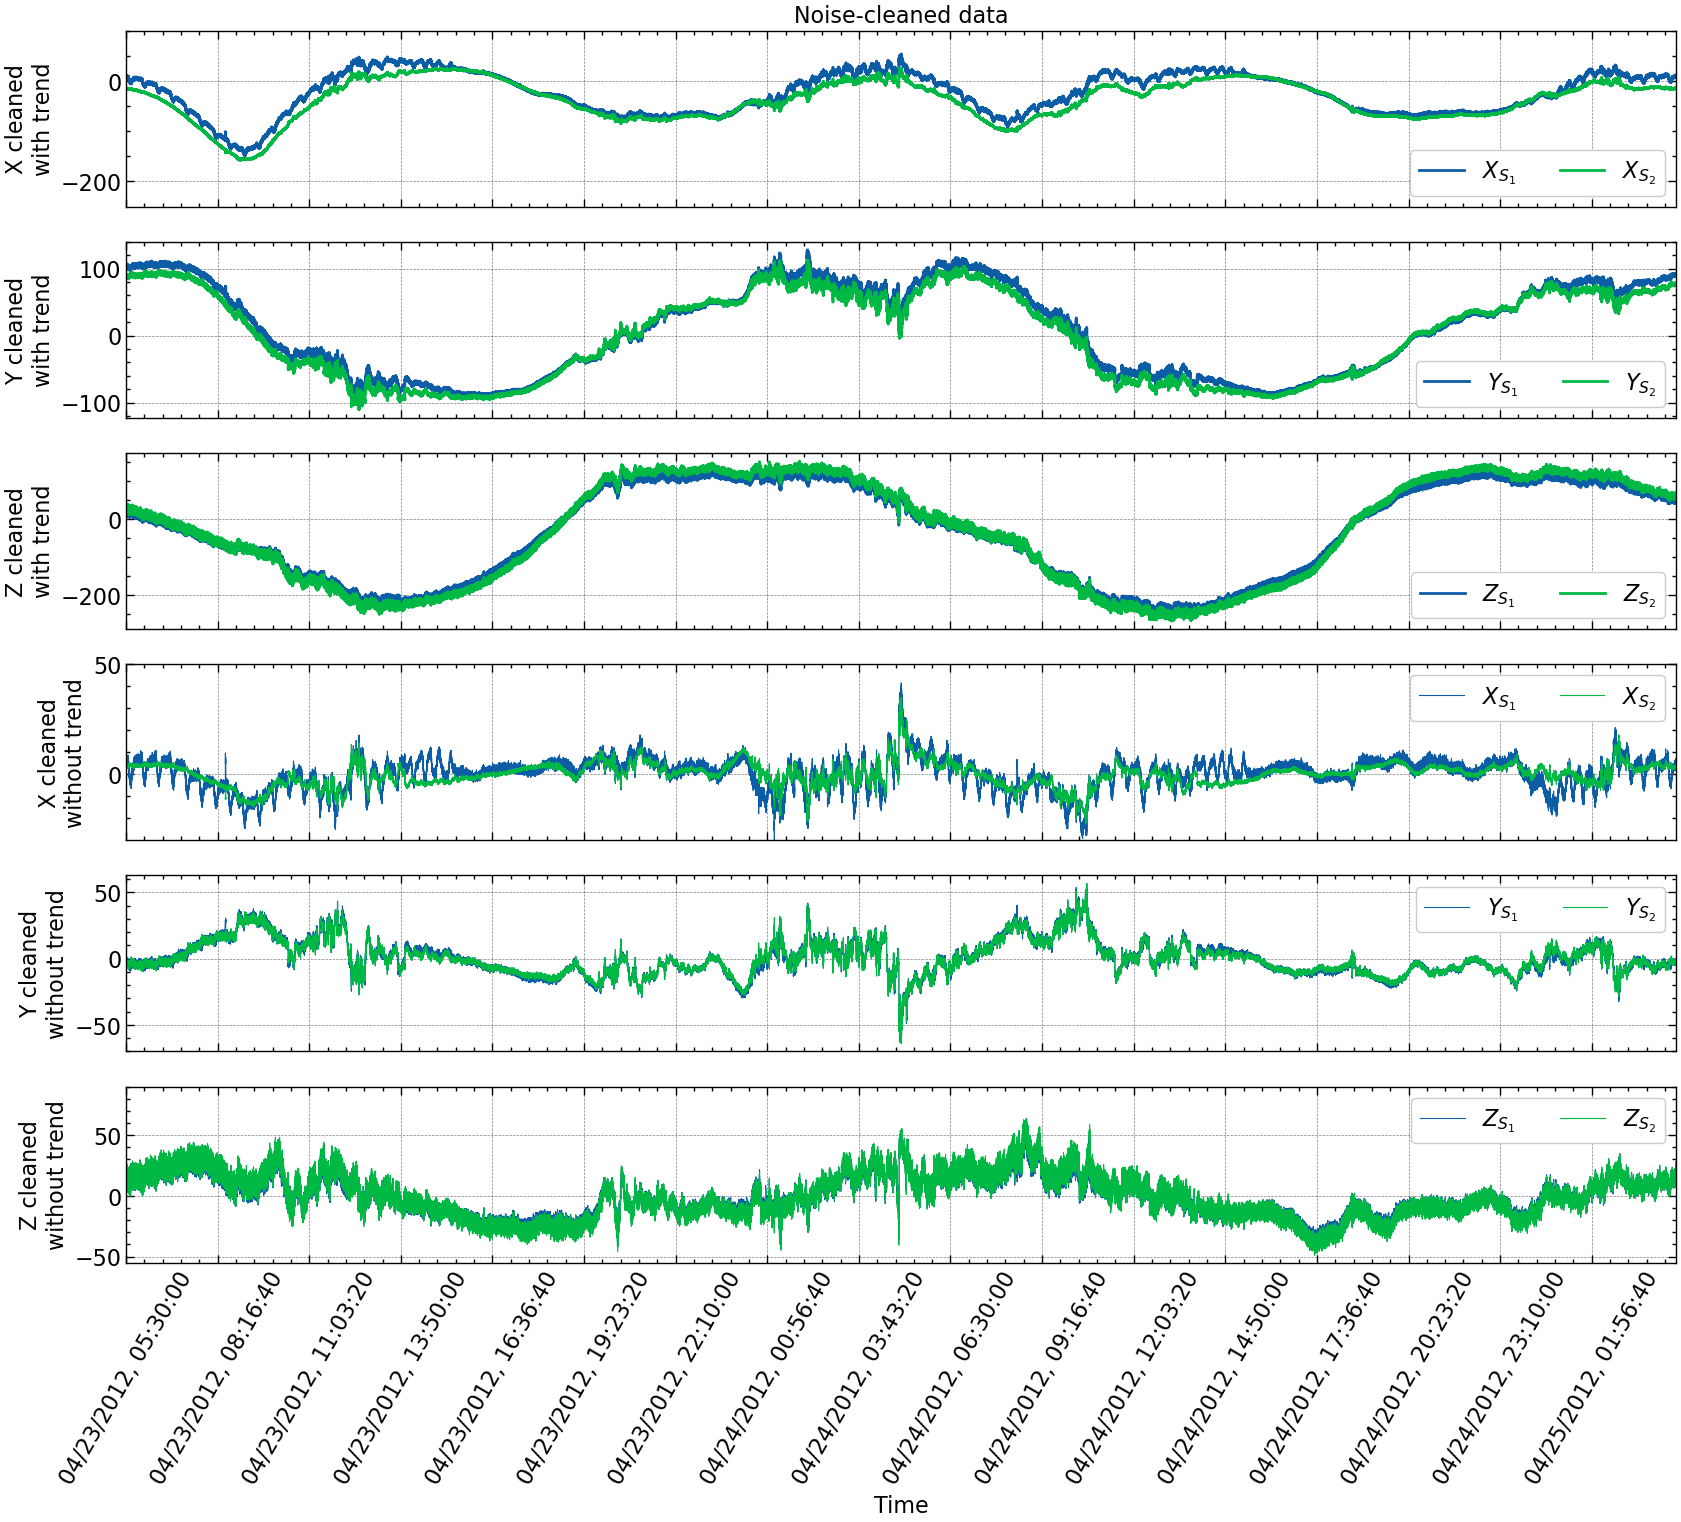

In [53]:
plt.rcParams["figure.figsize"]=[20,16]
fig, axs = plt.subplots(6,sharex=True)
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
axs[0].plot(timestamps[:-3600],trend_x_clean)
axs[0].set(ylabel="X cleaned\nwith trend")
axs[0].set(title="Noise-cleaned data")
axs[0].legend(["$X_{S_1}$","$X_{S_2}$"],loc="lower right",ncol=2)
axs[0].set(ylim=(-250,100))

axs[1].plot(timestamps[:-3600],trend_y_clean)
axs[1].set(ylabel="Y cleaned\nwith trend")
axs[1].legend(["$Y_{S_1}$","$Y_{S_2}$"],loc="lower right",ncol=2)

axs[2].plot(timestamps[:-3600],trend_z_clean)
axs[2].set(ylabel="Z cleaned\nwith trend")
axs[2].legend(["$Z_{S_1}$","$Z_{S_2}$"],loc="lower right",ncol=2)

axs[3].plot(timestamps[:-3600],data_clean[0],lw=0.8)
axs[3].plot(timestamps[:-3600],data_clean[1],lw=0.8)
axs[3].set(ylabel="X cleaned\nwithout trend")
axs[3].legend(["$X_{S_1}$","$X_{S_2}$"],loc="upper right",ncol=2)
axs[3].set(ylim=(-30,50))

axs[4].plot(timestamps[:-3600],data_clean[2],lw=0.8)
axs[4].plot(timestamps[:-3600],data_clean[3],lw=0.8)
axs[4].set(ylabel="Y cleaned\nwithout trend")
axs[4].legend(["$Y_{S_1}$","$Y_{S_2}$"],loc="upper right",ncol=2)

axs[5].plot(timestamps[:-3600],data_clean[4],lw=0.8)
axs[5].plot(timestamps[:-3600],data_clean[5],lw=0.8)
axs[5].set(ylabel="Z cleaned\nwithout trend")
axs[5].legend(["$Z_{S_1}$","$Z_{S_2}$"],loc="upper right",ncol=2)
axs[5].set(ylim=(-55,90))

plt.xlabel("Time")
plt.savefig("cleaned-data.png",dpi=300)